<a href="https://colab.research.google.com/github/chienrya8/acled/blob/main/acled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Engineer Take-Home Assessment: Event Data Trends and Analysis

10/16/2025

Ryan Chien

# Read Data

In [1]:
# get local acled data
from google.colab import files
uploaded = files.upload()

In [1]:
# read and preview
import pandas as pd
df = pd.read_excel(
    "Africa_aggregated_data_up_to-2025-10-04.xlsx",
    engine="openpyxl"
)

In [2]:
df = df.sort_values(by=["WEEK", "REGION", "COUNTRY"])
df.head(5)

WEEK          REGION                   COUNTRY   ADMIN1  \
163263 1996-12-28  Eastern Africa                    Rwanda     West   
241927 1996-12-28  Eastern Africa                    Uganda     Gulu   
246355 1996-12-28  Eastern Africa                    Uganda  Mityana   
9289   1996-12-28   Middle Africa                    Angola      Bie   
35458  1996-12-28   Middle Africa  Central African Republic   Bangui   

                        EVENT_TYPE SUB_EVENT_TYPE  EVENTS  FATALITIES  \
163263                     Battles    Armed clash       1           1   
241927                     Battles    Armed clash       1           4   
246355                     Battles    Armed clash       1           5   
9289    Violence against civilians         Attack       2          40   
35458                      Battles    Armed clash       2           4   

        POPULATION_EXPOSURE       DISORDER_TYPE      ID  CENTROID_LATITUDE  \
163263                  NaN  Political violence  2653.0            -2.1271   
241927                  NaN  Political violence  4015.0             3.0186   
246355                  NaN  Political violence  4077.0             0.4533   
9289                    NaN  Political violence  3723.0           -12.4421   
35458                   NaN  Political violence  3773.0             4.3755   

        CENTROID_LONGITUDE  
163263             29.3906  
241927             32.3885  
246355             32.0776  
9289               17.4172  
35458              18.5531

In [3]:
# import to geopandas
import geopandas as gpd
geometry = gpd.points_from_xy(df.CENTROID_LONGITUDE, df.CENTROID_LATITUDE)
gdf = gpd.GeoDataFrame(df, geometry = geometry, crs="EPSG:4326")
gdf.head(5)

WEEK          REGION                   COUNTRY   ADMIN1  \
163263 1996-12-28  Eastern Africa                    Rwanda     West   
241927 1996-12-28  Eastern Africa                    Uganda     Gulu   
246355 1996-12-28  Eastern Africa                    Uganda  Mityana   
9289   1996-12-28   Middle Africa                    Angola      Bie   
35458  1996-12-28   Middle Africa  Central African Republic   Bangui   

                        EVENT_TYPE SUB_EVENT_TYPE  EVENTS  FATALITIES  \
163263                     Battles    Armed clash       1           1   
241927                     Battles    Armed clash       1           4   
246355                     Battles    Armed clash       1           5   
9289    Violence against civilians         Attack       2          40   
35458                      Battles    Armed clash       2           4   

        POPULATION_EXPOSURE       DISORDER_TYPE      ID  CENTROID_LATITUDE  \
163263                  NaN  Political violence  2653.0            -2.1271   
241927                  NaN  Political violence  4015.0             3.0186   
246355                  NaN  Political violence  4077.0             0.4533   
9289                    NaN  Political violence  3723.0           -12.4421   
35458                   NaN  Political violence  3773.0             4.3755   

        CENTROID_LONGITUDE                  geometry  
163263             29.3906   POINT (29.3906 -2.1271)  
241927             32.3885    POINT (32.3885 3.0186)  
246355             32.0776    POINT (32.0776 0.4533)  
9289               17.4172  POINT (17.4172 -12.4421)  
35458              18.5531    POINT (18.5531 4.3755)

**Basic Data Exploration**

# Basic Data Exploration

In [4]:
df.describe()

WEEK         EVENTS     FATALITIES  \
count                         254680  254680.000000  254680.000000   
mean   2018-01-03 04:06:00.395790592       1.757240       4.136289   
min              1996-12-28 00:00:00       1.000000       0.000000   
25%              2014-11-08 00:00:00       1.000000       0.000000   
50%              2020-01-11 00:00:00       1.000000       0.000000   
75%              2023-02-11 00:00:00       2.000000       1.000000   
max              2025-10-04 00:00:00      92.000000   12268.000000   
std                              NaN       2.043107      65.831132   

       POPULATION_EXPOSURE             ID  CENTROID_LATITUDE  \
count         1.080560e+05  254677.000000      254680.000000   
mean          3.641424e+04    2406.896488           6.526910   
min           1.000000e+00      47.000000         -32.635100   
25%           4.428000e+03    1543.000000          -0.236200   
50%           1.313600e+04    3023.000000           6.538000   
75%           3.477300e+04    3338.000000          12.909300   
max           3.118803e+06    4169.000000          37.036300   
std           7.953109e+04    1193.222293          14.838192   

       CENTROID_LONGITUDE  
count       254680.000000  
mean            21.376255  
min            -25.197600  
25%              7.188300  
50%             26.590300  
75%             33.396700  
max             72.420800  
std             16.933404

In [5]:
df.REGION.unique()

array(['Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Western Africa', 'Southern Africa'], dtype=object)

In [6]:
df.COUNTRY.unique()

array(['Rwanda', 'Uganda', 'Angola', 'Central African Republic',
       'Algeria', 'Egypt', 'Libya', 'Sudan', 'Sierra Leone', 'Burundi',
       'Republic of Congo', 'South Africa', 'Mali', 'Niger', 'Nigeria',
       'Ethiopia', 'Kenya', 'Morocco', 'Namibia', 'Liberia',
       'Ivory Coast', 'Togo', 'eSwatini', 'Burkina Faso', 'Gambia',
       'Eritrea', 'Lesotho', 'Somalia', 'Chad', 'Cameroon',
       'Democratic Republic of Congo', 'Zambia', 'Ghana', 'Mauritania',
       'Senegal', 'Malawi', 'Zimbabwe', 'Guinea-Bissau', 'Mozambique',
       'Tanzania', 'Equatorial Guinea', 'Madagascar', 'Gabon', 'Djibouti',
       'Benin', 'Botswana', 'Guinea', 'Tunisia', 'South Sudan', 'Comoros',
       'Reunion', 'Cape Verde', 'Mauritius', 'Mayotte', 'Seychelles',
       'Sao Tome and Principe',
       'Saint Helena, Ascension and Tristan da Cunha',
       'British Indian Ocean Territory'], dtype=object)

In [7]:
df.DISORDER_TYPE.unique()

array(['Political violence', 'Strategic developments',
       'Political violence; Demonstrations', 'Demonstrations'],
      dtype=object)

In [8]:
df.groupby(["WEEK", "REGION", "COUNTRY"]).count()

ADMIN1  EVENT_TYPE  \
WEEK       REGION          COUNTRY                                        
1996-12-28 Eastern Africa  Rwanda                         1           1   
                           Uganda                         2           2   
           Middle Africa   Angola                         1           1   
                           Central African Republic       1           1   
           Northern Africa Algeria                        3           3   
...                                                     ...         ...   
2025-10-04 Western Africa  Liberia                        1           1   
                           Mali                          28          28   
                           Mauritania                     2           2   
                           Niger                          3           3   
                           Nigeria                       47          47   

                                                     SUB_EVENT_TYPE  EVENTS  \
WEEK       REGION          COUNTRY                                            
1996-12-28 Eastern Africa  Rwanda                                 1       1   
                           Uganda                                 2       2   
           Middle Africa   Angola                                 1       1   
                           Central African Republic               1       1   
           Northern Africa Algeria                                3       3   
...                                                             ...     ...   
2025-10-04 Western Africa  Liberia                                1       1   
                           Mali                                  28      28   
                           Mauritania                             2       2   
                           Niger                                  3       3   
                           Nigeria                               47      47   

                                                     FATALITIES  \
WEEK       REGION          COUNTRY                                
1996-12-28 Eastern Africa  Rwanda                             1   
                           Uganda                             2   
           Middle Africa   Angola                             1   
                           Central African Republic           1   
           Northern Africa Algeria                            3   
...                                                         ...   
2025-10-04 Western Africa  Liberia                            1   
                           Mali                              28   
                           Mauritania                         2   
                           Niger                              3   
                           Nigeria                           47   

                                                     POPULATION_EXPOSURE  \
WEEK       REGION          COUNTRY                                         
1996-12-28 Eastern Africa  Rwanda                                      0   
                           Uganda                                      0   
           Middle Africa   Angola                                      0   
                           Central African Republic                    0   
           Northern Africa Algeria                                     0   
...                                                                  ...   
2025-10-04 Western Africa  Liberia                                     1   
                           Mali                                       17   
                           Mauritania                                  2   
                           Niger                                       3   
                           Nigeria                                    36   

                                                     DISORDER_TYPE  ID  \
WEEK       REGION          COUNTRY                                       
1996-12-28 Eastern Africa  Rwanda       

... we have unobserved variable problem - not all countries have all timestamp observations

In [9]:
df[df.WEEK=="1996-12-28"].COUNTRY.unique()

array(['Rwanda', 'Uganda', 'Angola', 'Central African Republic',
       'Algeria', 'Egypt', 'Libya', 'Sudan', 'Sierra Leone'], dtype=object)

In [10]:
df[df.WEEK=="2025-10-04"].COUNTRY.unique()

array(['Burundi', 'Comoros', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi',
       'Mauritius', 'Mozambique', 'Somalia', 'South Sudan', 'Tanzania',
       'Uganda', 'Cameroon', 'Central African Republic', 'Chad',
       'Democratic Republic of Congo', 'Gabon', 'Algeria', 'Egypt',
       'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Namibia', 'South Africa',
       'Zambia', 'eSwatini', 'Benin', 'Burkina Faso', 'Cape Verde',
       'Ghana', 'Guinea', 'Ivory Coast', 'Liberia', 'Mali', 'Mauritania',
       'Niger', 'Nigeria'], dtype=object)

In [11]:
import folium
from folium.plugins import HeatMapWithTime
import json

def map_acled_year_slider_with_markers(gdf,):
    """
    Create map with markers grouped by year and layer control.
    Better for seeing individual events.

    Parameters:
    -----------
    gdf : GeoDataFrame
        ACLED geodataframe

    Returns:
    --------
    folium.Map : The map object
    """

    # Convert to datetime
    gdf['date'] = pd.to_datetime(gdf['WEEK'])

    # Extract year
    gdf['year'] = gdf['date'].dt.year

    # Get unique years
    years = sorted(gdf['year'].unique())

    # Create base map
    m = folium.Map(location=[0, 20], zoom_start=3, tiles='OpenStreetMap')

    print(f"Processing {len(years)} years...")

    # Color palette for years
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'darkblue',
              'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'gray']

    for idx, year in enumerate(years):
        color = colors[idx % len(colors)]

        # Create feature group for this year
        fg = folium.FeatureGroup(name=f'{year}', show=(idx == len(years) - 1))  # Show most recent year by default

        # Get data for this year
        year_data = gdf[gdf['year'] == year]

        event_count = len(year_data)
        print(f"  {year}: {event_count} events")

        # Add markers for each event
        for jdx, row in year_data.iterrows():
            coords = [row.geometry.y, row.geometry.x]

            # Get event details
            event_type = row.get('event_type', 'Unknown')
            country = row.get('country', 'Unknown')
            date_str = str(row['date'].date())

            popup_text = f"""
            <b>Year:</b> {year}<br>
            <b>Date:</b> {date_str}<br>
            <b>Country:</b> {country}<br>
            <b>Event Type:</b> {event_type}
            """

            folium.CircleMarker(
                location=coords,
                radius=5,
                popup=folium.Popup(popup_text, max_width=250),
                color=color,
                fill=True,
                fillColor=color,
                fillOpacity=0.7,
                weight=2
            ).add_to(fg)

        fg.add_to(m)

    # Add layer control
    folium.LayerControl(collapsed=False, position='topleft').add_to(m)

    # Add title
    title_html = '''
    <div style="position: fixed;
                bottom: 10px; right: 10px; width: 280px; height: 80px;
                background-color: white; border:2px solid grey; z-index:9999;
                font-size:12px; padding: 10px; border-radius: 5px;">
        <b>ACLED Africa by Year</b><br>
        Toggle years on/off using the layer control.<br>
        Click markers for event details.
    </div>
    '''
    m.get_root().html.add_child(folium.Element(title_html))

    display(m)

map_acled_year_slider_with_markers(gdf[gdf.REGION=="Northern Africa"].head(3000))

Processing 10 years...
  1996: 7 events
  1997: 315 events
  1998: 239 events
  1999: 234 events
  2000: 356 events
  2001: 347 events
  2002: 466 events
  2003: 356 events
  2004: 454 events
  2005: 226 events


# Feature Engineering

**Analyze**

Violence self-correlation:
- ... can we fit a model to identify anomalous fatalities?
- ... fit model where y=fatalities_region_wk_t and x={features}_region_wk_t-1

Violence neighbor-correlation:
- ... which regions are correlated to others?
- ... fit model where y=fatalities_region_wk_t and x={features}_notregion_wk_t-1

Y vars:
* FATALITIES: int

X vars:
* FATALITIES: int
* EVENTS: int
* POPULATION_EXPOSURE: int (control)
* EVENT_TYPE: cat
* DISORDER_TYPE: cat

Feature descriptions: https://acleddata.com/methodology/acled-codebook#event-types-table

In [12]:
# generate categoricals through one hot encoding
CATEGORICAL_COLS = ["EVENT_TYPE", "DISORDER_TYPE"]
df_cat = pd.get_dummies(df, columns=CATEGORICAL_COLS)
df_cat.head(5)

WEEK          REGION                   COUNTRY   ADMIN1  \
163263 1996-12-28  Eastern Africa                    Rwanda     West   
241927 1996-12-28  Eastern Africa                    Uganda     Gulu   
246355 1996-12-28  Eastern Africa                    Uganda  Mityana   
9289   1996-12-28   Middle Africa                    Angola      Bie   
35458  1996-12-28   Middle Africa  Central African Republic   Bangui   

       SUB_EVENT_TYPE  EVENTS  FATALITIES  POPULATION_EXPOSURE      ID  \
163263    Armed clash       1           1                  NaN  2653.0   
241927    Armed clash       1           4                  NaN  4015.0   
246355    Armed clash       1           5                  NaN  4077.0   
9289           Attack       2          40                  NaN  3723.0   
35458     Armed clash       2           4                  NaN  3773.0   

        CENTROID_LATITUDE  ...  EVENT_TYPE_Battles  \
163263            -2.1271  ...                True   
241927             3.0186  ...                True   
246355             0.4533  ...                True   
9289             -12.4421  ...               False   
35458              4.3755  ...                True   

        EVENT_TYPE_Explosions/Remote violence  EVENT_TYPE_Protests  \
163263                                  False                False   
241927                                  False                False   
246355                                  False                False   
9289                                    False                False   
35458                                   False                False   

        EVENT_TYPE_Riots  EVENT_TYPE_Strategic developments  \
163263             False                              False   
241927             False                              False   
246355             False                              False   
9289               False                              False   
35458              False                              False   

        EVENT_TYPE_Violence against civilians  DISORDER_TYPE_Demonstrations  \
163263                                  False                         False   
241927                                  False                         False   
246355                                  False                         False   
9289                                     True                         False   
35458                                   False                         False   

        DISORDER_TYPE_Political violence  \
163263                              True   
241927                              True   
246355                              True   
9289                                True   
35458                               True   

        DISORDER_TYPE_Political violence; Demonstrations  \
163263                                             False   
241927                                             False   
246355                                             False   
9289                                               False   
35458                                              False   

        DISORDER_TYPE_Strategic developments  
163263                                 False  
241927                                 False  
246355                                 False  
9289                                   False  
35458                                  False  

[5 rows x 21 columns]

In [13]:
df_cat.columns

Index(['WEEK', 'REGION', 'COUNTRY', 'ADMIN1', 'SUB_EVENT_TYPE', 'EVENTS',
       'FATALITIES', 'POPULATION_EXPOSURE', 'ID', 'CENTROID_LATITUDE',
       'CENTROID_LONGITUDE', 'EVENT_TYPE_Battles',
       'EVENT_TYPE_Explosions/Remote violence', 'EVENT_TYPE_Protests',
       'EVENT_TYPE_Riots', 'EVENT_TYPE_Strategic developments',
       'EVENT_TYPE_Violence against civilians', 'DISORDER_TYPE_Demonstrations',
       'DISORDER_TYPE_Political violence',
       'DISORDER_TYPE_Political violence; Demonstrations',
       'DISORDER_TYPE_Strategic developments'],
      dtype='object')

In [14]:
idx = sum([df_cat.columns.str.startswith(cat) for cat in CATEGORICAL_COLS])
idx = [bool(i) for i in idx]

In [15]:
# now aggregate by week, country
GROUP_COLS = ["WEEK", "COUNTRY"]
one_hot_idx = sum([df_cat.columns.str.startswith(cat) for cat in CATEGORICAL_COLS])
one_hot_idx = [bool(i) for i in one_hot_idx]
ONE_HOT_COLS = df_cat.columns.values[one_hot_idx].tolist()
FEATURE_COLS = ["FATALITIES", "EVENTS", "POPULATION_EXPOSURE"] + ONE_HOT_COLS
df_agg = df_cat.groupby(GROUP_COLS)[FEATURE_COLS].sum()
df_agg = df_agg.reset_index()
df_agg.head(5)

WEEK                   COUNTRY  FATALITIES  EVENTS  \
0 1996-12-28                   Algeria           9       3   
1 1996-12-28                    Angola          40       2   
2 1996-12-28  Central African Republic           4       2   
3 1996-12-28                     Egypt           1       1   
4 1996-12-28                     Libya           8       1   

   POPULATION_EXPOSURE  EVENT_TYPE_Battles  \
0                  0.0                   0   
1                  0.0                   0   
2                  0.0                   1   
3                  0.0                   1   
4                  0.0                   0   

   EVENT_TYPE_Explosions/Remote violence  EVENT_TYPE_Protests  \
0                                      0                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    0   
4                                      0                    0   

   EVENT_TYPE_Riots  EVENT_TYPE_Strategic developments  \
0                 0                                  0   
1                 0                                  0   
2                 0                                  0   
3                 0                                  0   
4                 0                                  0   

   EVENT_TYPE_Violence against civilians  DISORDER_TYPE_Demonstrations  \
0                                      3                             0   
1                                      1                             0   
2                                      0                             0   
3                                      0                             0   
4                                      1                             0   

   DISORDER_TYPE_Political violence  \
0                                 3   
1                                 1   
2                                 1   
3                                 1   
4                                 1   

   DISORDER_TYPE_Political violence; Demonstrations  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   DISORDER_TYPE_Strategic developments  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0

In [16]:
# now fill in missing observations with 0
def fill_missing_weeks_multiindex(df, group_col, date_col, value_col):
    """
    Fill missing week observations with zero using MultiIndex.

    Parameters:
    -----------
    df : DataFrame
        Input dataframe with date column
    group_col : str
        Column to group by (e.g., 'country', 'region')
    date_col : str
        Date column name
    value_col : str or list
        Value column(s) to aggregate/fill

    Returns:
    --------
    DataFrame : Reindexed dataframe with missing weeks filled as zero

    Example:
    --------
    df_filled = fill_missing_weeks_multiindex(df, 'country', 'date', 'events')
    """

    # Convert to datetime
    df[date_col] = pd.to_datetime(df[date_col])

    # Extract year and week
    df['year'] = df[date_col].dt.year
    df['week'] = df[date_col].dt.isocalendar().week
    df['year_week'] = df['year'].astype(str) + '-W' + df['week'].astype(str).str.zfill(2)

    # Group by group_col and year_week, then sum values
    grouped = df.groupby([group_col, 'year_week'])[value_col].sum().reset_index()

    # Create MultiIndex
    grouped = grouped.set_index([group_col, 'year_week'])

    # Get all unique groups and weeks
    groups = grouped.index.get_level_values(0).unique()
    weeks = sorted(grouped.index.get_level_values(1).unique())

    # Create complete MultiIndex
    complete_index = pd.MultiIndex.from_product(
        [groups, weeks],
        names=[group_col, 'year_week']
    )

    # Reindex and fill missing values with 0
    grouped_filled = grouped.reindex(complete_index, fill_value=0)

    # Reset index to get back to regular columns
    result = grouped_filled.reset_index()

    return result

df_agg_fill = fill_missing_weeks_multiindex(df_agg, "COUNTRY", "WEEK", FEATURE_COLS)
df_agg_fill.head(5)

COUNTRY year_week  FATALITIES  EVENTS  POPULATION_EXPOSURE  \
0  Algeria  1996-W52           9       3                  0.0   
1  Algeria  1997-W01          90       9                  0.0   
2  Algeria  1997-W02          89      10                  0.0   
3  Algeria  1997-W03         226      13                  0.0   
4  Algeria  1997-W04          51       7                  0.0   

   EVENT_TYPE_Battles  EVENT_TYPE_Explosions/Remote violence  \
0                   0                                      0   
1                   2                                      2   
2                   2                                      1   
3                   1                                      2   
4                   1                                      1   

   EVENT_TYPE_Protests  EVENT_TYPE_Riots  EVENT_TYPE_Strategic developments  \
0                    0                 0                                  0   
1                    0                 0                                  0   
2                    0                 0                                  0   
3                    0                 0                                  0   
4                    0                 0                                  0   

   EVENT_TYPE_Violence against civilians  DISORDER_TYPE_Demonstrations  \
0                                      3                             0   
1                                      4                             0   
2                                      4                             0   
3                                      2                             0   
4                                      3                             0   

   DISORDER_TYPE_Political violence  \
0                                 3   
1                                 8   
2                                 7   
3                                 5   
4                                 5   

   DISORDER_TYPE_Political violence; Demonstrations  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   DISORDER_TYPE_Strategic developments  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0

In [17]:
df_agg[df_agg.COUNTRY=='Angola'].shape

(761, 18)

In [18]:
df_agg_fill[df_agg_fill.COUNTRY=='Angola'].shape

(1499, 15)

In [19]:
# Problem solved for missing observations
df_agg_fill[df_agg_fill.COUNTRY=='Angola'].shape == \
  df_agg_fill[df_agg_fill.COUNTRY=='Sudan'].shape

True

In [20]:
# which countries have most observations?
K = 10
top_k_countries = df_agg.groupby("COUNTRY")["WEEK"].count() \
    .sort_values(ascending=False).head(K).index.tolist()
top_k_countries

['Sudan',
 'Democratic Republic of Congo',
 'Nigeria',
 'Kenya',
 'Algeria',
 'South Africa',
 'Somalia',
 'Uganda',
 'Zimbabwe',
 'Burundi']

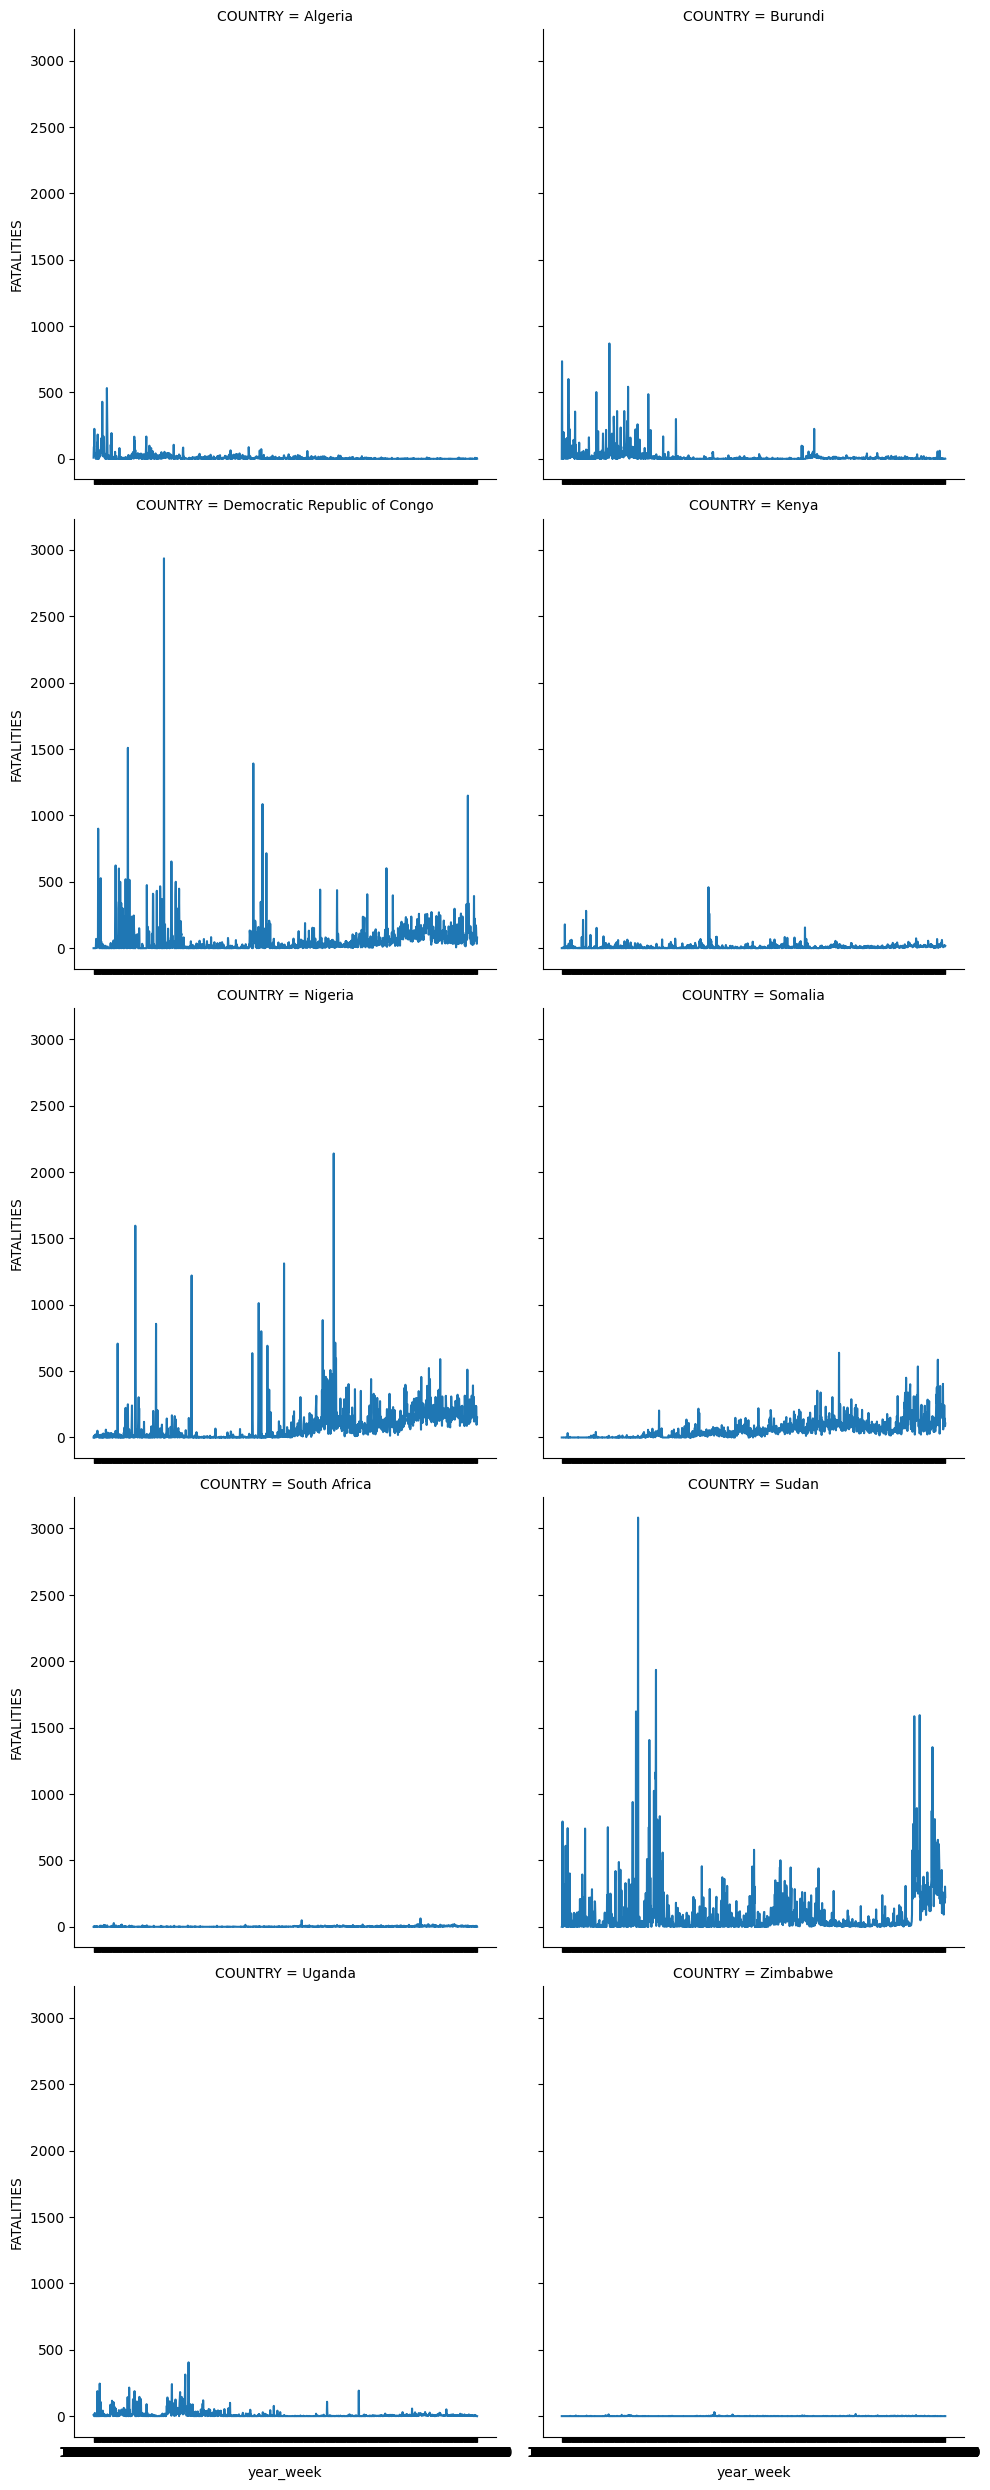

In [21]:
# is there any time-series signal? check via plotting
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(data=df_agg_fill[df_agg_fill.COUNTRY.isin(top_k_countries)],
            x="year_week", y="FATALITIES", col="COUNTRY", kind="line",
            col_wrap=2)


In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# run standard scaler
def scale_by_country_groupby(df, country_col='COUNTRY', scale_cols=None):
    """
    Alternative approach using groupby (more efficient).

    Parameters:
    -----------
    df : DataFrame
        Input dataframe
    country_col : str
        Country column name
    scale_cols : list or None
        Columns to scale

    Returns:
    --------
    DataFrame : Dataframe with scaled columns
    """

    df_copy = df.copy()

    # Select columns to scale
    if scale_cols is None:
        exclude_cols = [country_col, 'year_week']
        scale_cols = df_copy.select_dtypes(include=[np.number]).columns.tolist()
        scale_cols = [col for col in scale_cols if col not in exclude_cols]

    print(f"Scaling columns: {scale_cols}")
    print(f"Number of countries: {df_copy[country_col].nunique()}\n")

    scaler = StandardScaler()

    # Scale each column by country using groupby
    all_scaled_col_names = []
    for col in scale_cols:
        scaled_col_name = f"{col}_scaled"
        all_scaled_col_names.append(scaled_col_name)
        # Apply scaler to each country group
        df_copy[scaled_col_name] = df_copy.groupby(country_col)[col].transform(
            lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
        )

        print(f"✓ Scaled {col}")

    return df_copy, all_scaled_col_names

df_agg_fill_feat, scaled_feat_cols = scale_by_country_groupby(
    df_agg_fill,
    country_col="COUNTRY",
    scale_cols=FEATURE_COLS
)

Scaling columns: ['FATALITIES', 'EVENTS', 'POPULATION_EXPOSURE', 'EVENT_TYPE_Battles', 'EVENT_TYPE_Explosions/Remote violence', 'EVENT_TYPE_Protests', 'EVENT_TYPE_Riots', 'EVENT_TYPE_Strategic developments', 'EVENT_TYPE_Violence against civilians', 'DISORDER_TYPE_Demonstrations', 'DISORDER_TYPE_Political violence', 'DISORDER_TYPE_Political violence; Demonstrations', 'DISORDER_TYPE_Strategic developments']
Number of countries: 58

✓ Scaled FATALITIES
✓ Scaled EVENTS
✓ Scaled POPULATION_EXPOSURE
✓ Scaled EVENT_TYPE_Battles
✓ Scaled EVENT_TYPE_Explosions/Remote violence
✓ Scaled EVENT_TYPE_Protests
✓ Scaled EVENT_TYPE_Riots
✓ Scaled EVENT_TYPE_Strategic developments
✓ Scaled EVENT_TYPE_Violence against civilians
✓ Scaled DISORDER_TYPE_Demonstrations
✓ Scaled DISORDER_TYPE_Political violence
✓ Scaled DISORDER_TYPE_Political violence; Demonstrations
✓ Scaled DISORDER_TYPE_Strategic developments


In [23]:
NEW_GROUP_COLS = ["COUNTRY", "year_week"]
df_agg_fill_feat[NEW_GROUP_COLS+scaled_feat_cols].head(5)

COUNTRY year_week  FATALITIES_scaled  EVENTS_scaled  \
0  Algeria  1996-W52          -0.007505      -0.416201   
1  Algeria  1997-W01           2.931900       0.034800   
2  Algeria  1997-W02           2.895611       0.109967   
3  Algeria  1997-W03           7.867197       0.335468   
4  Algeria  1997-W04           1.516631      -0.115533   

   POPULATION_EXPOSURE_scaled  EVENT_TYPE_Battles_scaled  \
0                   -0.320182                  -0.749168   
1                   -0.320182                   0.977200   
2                   -0.320182                   0.977200   
3                   -0.320182                   0.114016   
4                   -0.320182                   0.114016   

   EVENT_TYPE_Explosions/Remote violence_scaled  EVENT_TYPE_Protests_scaled  \
0                                     -0.481549                   -0.497634   
1                                      2.252701                   -0.497634   
2                                      0.885576                   -0.497634   
3                                      2.252701                   -0.497634   
4                                      0.885576                   -0.497634   

   EVENT_TYPE_Riots_scaled  EVENT_TYPE_Strategic developments_scaled  \
0                 -0.39131                                 -0.343683   
1                 -0.39131                                 -0.343683   
2                 -0.39131                                 -0.343683   
3                 -0.39131                                 -0.343683   
4                 -0.39131                                 -0.343683   

   EVENT_TYPE_Violence against civilians_scaled  \
0                                      3.414056   
1                                      4.717920   
2                                      4.717920   
3                                      2.110191   
4                                      3.414056   

   DISORDER_TYPE_Demonstrations_scaled  \
0                            -0.524214   
1                            -0.524214   
2                            -0.524214   
3                            -0.524214   
4                            -0.524214   

   DISORDER_TYPE_Political violence_scaled  \
0                                 0.679483   
1                                 3.303248   
2                                 2.778495   
3                                 1.728989   
4                                 1.728989   

   DISORDER_TYPE_Political violence; Demonstrations_scaled  \
0                                          -0.122478         
1                                          -0.122478         
2                                          -0.122478         
3                                          -0.122478         
4                                          -0.122478         

   DISORDER_TYPE_Strategic developments_scaled  
0                                    -0.343683  
1                                    -0.343683  
2                                    -0.343683  
3                                    -0.343683  
4                                    -0.343683

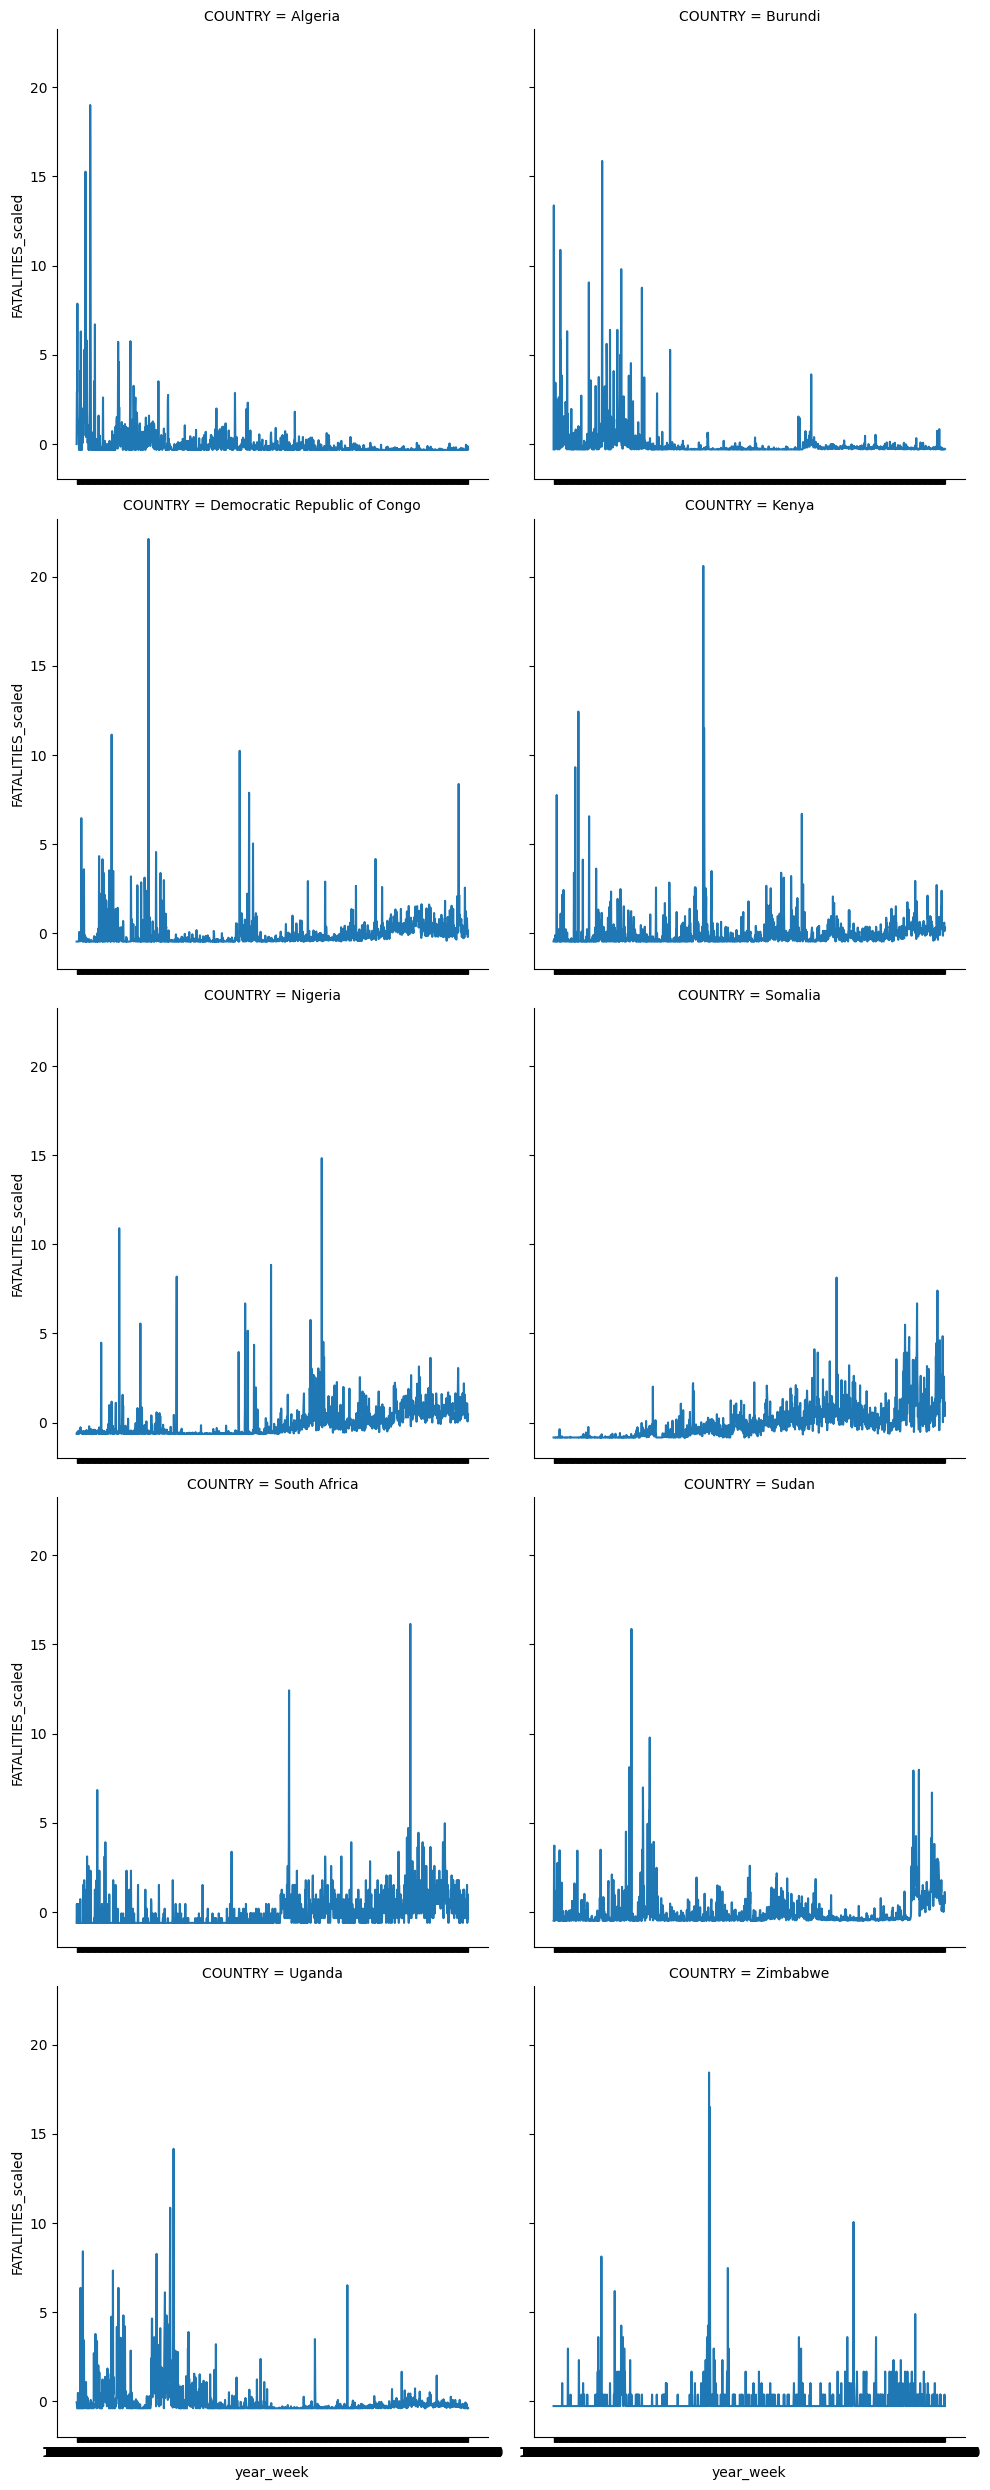

In [24]:
# view post-scaling to make sure it worked
sns.relplot(data=df_agg_fill_feat[df_agg_fill_feat.COUNTRY.isin(top_k_countries)],
            x="year_week", y="FATALITIES_scaled", col="COUNTRY", kind="line",
            col_wrap=2)

# Modeling

In [50]:
from sklearn.linear_model import LinearRegression
from scipy import stats

def timeseries_regression_by_country(df, country_col='COUNTRY', time_col='year_week',
                                     y_col='FATALITIES', x_cols=None, lag_periods=1,
                                     include_lagged_y=False, y_lag_periods=1,
                                     include_seasonality=False):
    """
    Run time-series regression for each country separately with lagged features.

    Parameters:
    -----------
    df : DataFrame
        Input dataframe (should be sorted by country and time)
    country_col : str
        Country column name
    time_col : str
        Time column name (year_week format)
    y_col : str
        Target variable (e.g., 'FATALITIES')
    x_cols : list or None
        Features to use. If None, uses all numeric columns except target and identifiers
    lag_periods : int
        Number of periods to lag X variables
    include_lagged_y : bool
        Whether to include lagged y variable as X (autoregressive term)
    y_lag_periods : int
        Number of periods to lag y variable (if include_lagged_y=True)
    include_seasonality : bool
        Whether to include seasonal features (sine/cosine for weekly patterns)

    Returns:
    --------
    DataFrame : Results with coefficients, R², p-values for each country

    Example:
    --------
    results = timeseries_regression_by_country(
        df,
        y_col='FATALITIES',
        x_cols=['EVENTS', 'POPULATION_EXPOSURE'],
        lag_periods=1,
        include_lagged_y=True,
        y_lag_periods=1
    )
    """

    df_copy = df.copy()

    # If x_cols not specified, use all numeric columns except target and identifiers
    if x_cols is None:
        exclude_cols = [country_col, time_col, y_col]
        x_cols = df_copy.select_dtypes(include=[np.number]).columns.tolist()
        x_cols = [col for col in x_cols if col not in exclude_cols]

    # Sort by country and time to ensure proper lagging
    df_copy = df_copy.sort_values([country_col, time_col]).reset_index(drop=True)

    # Convert time to numeric (time index) - reset for each country
    df_copy['time_index'] = df_copy.groupby(country_col).cumcount()

    # CREATE SEASONAL FEATURES IF REQUESTED
    if include_seasonality:
        # Extract week number from year_week (e.g., "2020-W23" -> 23)
        df_copy['week_num'] = df_copy[time_col].str.split('-W').str[1].astype(int)

        # Create cyclical seasonal features (sine and cosine for 52-week cycle)
        df_copy['sin_week'] = np.sin(2 * np.pi * df_copy['week_num'] / 52)
        df_copy['cos_week'] = np.cos(2 * np.pi * df_copy['week_num'] / 52)

    # CREATE LAGGED X VARIABLES FOR EACH COUNTRY
    for col in x_cols:
        for lag in range(1, lag_periods + 1):
            lag_col_name = f'{col}_lag_{lag}'
            df_copy[lag_col_name] = df_copy.groupby(country_col)[col].shift(lag)

    # CREATE LAGGED Y VARIABLES IF REQUESTED
    if include_lagged_y:
        for lag in range(1, y_lag_periods + 1):
            y_lag_col_name = f'{y_col}_lag_{lag}'
            df_copy[y_lag_col_name] = df_copy.groupby(country_col)[y_col].shift(lag)

    print(f"Target: {y_col} (y_t)")
    print(f"X Features: {x_cols}")
    print(f"X lag periods: {lag_periods}")
    print(f"Include lagged Y: {include_lagged_y}")
    if include_lagged_y:
        print(f"Y lag periods: {y_lag_periods}")
    print(f"Countries: {df_copy[country_col].nunique()}\n")

    results = []

    # Fit regression for each country
    for country in sorted(df_copy[country_col].unique()):
        country_data = df_copy[df_copy[country_col] == country].copy()

        # Remove rows with NaN values from lagging
        country_data = country_data.dropna()

        # Skip if too few observations
        if len(country_data) < 3:
            print(f"⊘ {country}: Too few observations ({len(country_data)})")
            continue

        # Build list of feature columns to use in regression
        lag_feature_cols = []

        # Add lagged X variables
        for col in x_cols:
            for lag in range(1, lag_periods + 1):
                lag_feature_cols.append(f'{col}_lag_{lag}')

        # Add lagged Y variables if included
        if include_lagged_y:
            for lag in range(1, y_lag_periods + 1):
                lag_feature_cols.append(f'{y_col}_lag_{lag}')

        # Add seasonal features if included
        if include_seasonality:
            lag_feature_cols.extend(['sin_week', 'cos_week'])

        # Create feature matrix
        X = country_data[['time_index'] + lag_feature_cols].values
        y = country_data[y_col].values

        # Fit model
        try:
            model = LinearRegression()
            model.fit(X, y)

            # Calculate statistics
            y_pred = model.predict(X)
            residuals = y - y_pred
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((y - np.mean(y))**2)
            r_squared = 1 - (ss_res / ss_tot)

            # F-statistic
            n = len(y)
            k = X.shape[1]
            f_stat = (r_squared / k) / ((1 - r_squared) / (n - k - 1))
            f_pvalue = 1 - stats.f.cdf(f_stat, k, n - k - 1)

            # RMSE
            rmse = np.sqrt(np.mean(residuals**2))

            # Store results
            result = {
                'Country': country,
                'N_Observations': n,
                'R_Squared': r_squared,
                'Adj_R_Squared': 1 - (1 - r_squared) * (n - 1) / (n - k - 1),
                'RMSE': rmse,
                'F_Statistic': f_stat,
                'F_P_Value': f_pvalue,
                'Intercept': model.intercept_,
                'Time_Trend_Coef': model.coef_[0],
            }

            # Add feature coefficients (correctly indexed)
            coef_idx = 1  # Start after time_index

            # Add lagged X coefficients
            for col in x_cols:
                for lag in range(1, lag_periods + 1):
                    result[f'{col}_lag_{lag}_Coef'] = model.coef_[coef_idx]
                    coef_idx += 1

            # Add lagged Y coefficients
            if include_lagged_y:
                for lag in range(1, y_lag_periods + 1):
                    result[f'{y_col}_lag_{lag}_Coef'] = model.coef_[coef_idx]
                    coef_idx += 1

            # Add seasonal coefficients
            if include_seasonality:
                result['sin_week_Coef'] = model.coef_[coef_idx]
                result['cos_week_Coef'] = model.coef_[coef_idx + 1]

            results.append(result)

            print(f"✓ {country}: R²={r_squared:.4f}, RMSE={rmse:.2f}, N={n}")

        except Exception as e:
            print(f"✗ {country}: Error - {str(e)}")

    results_df = pd.DataFrame(results)
    return results_df

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
# okay great! there may be sufficient signal here for anomaly detection
results = timeseries_regression_by_country(
    df_agg_fill_feat[df_agg_fill_feat.COUNTRY.isin(top_k_countries)],
    country_col="COUNTRY",
    time_col="year_week",
    y_col="FATALITIES",
    x_cols=scaled_feat_cols,
    lag_periods=104,    # weeks
    include_lagged_y=True,
    y_lag_periods=104,    # autoregressive weeks
    include_seasonality=True
)

Target: FATALITIES (y_t)
X Features: ['FATALITIES_scaled', 'EVENTS_scaled', 'POPULATION_EXPOSURE_scaled', 'EVENT_TYPE_Battles_scaled', 'EVENT_TYPE_Explosions/Remote violence_scaled', 'EVENT_TYPE_Protests_scaled', 'EVENT_TYPE_Riots_scaled', 'EVENT_TYPE_Strategic developments_scaled', 'EVENT_TYPE_Violence against civilians_scaled', 'DISORDER_TYPE_Demonstrations_scaled', 'DISORDER_TYPE_Political violence_scaled', 'DISORDER_TYPE_Political violence; Demonstrations_scaled', 'DISORDER_TYPE_Strategic developments_scaled']
X lag periods: 104
Include lagged Y: True
Y lag periods: 104
Countries: 10

✓ Algeria: R²=0.8201, RMSE=5.70, N=1395
✓ Burundi: R²=0.8872, RMSE=15.60, N=1395
✓ Democratic Republic of Congo: R²=0.7536, RMSE=64.22, N=1395
✓ Kenya: R²=0.8204, RMSE=8.42, N=1395
✓ Nigeria: R²=0.8646, RMSE=51.80, N=1395
✓ Somalia: R²=0.9779, RMSE=10.67, N=1395
✓ South Africa: R²=0.9222, RMSE=1.04, N=1395
✓ Sudan: R²=0.8607, RMSE=70.90, N=1395
✓ Uganda: R²=0.9241, RMSE=7.33, N=1395
✓ Zimbabwe: R²=0.8

In [78]:
def timeseries_regression_with_forecast(df, country_col='COUNTRY', time_col='year_week',
                                        y_col='FATALITIES', x_cols=None, lag_periods=1,
                                        include_lagged_y=False, y_lag_periods=1,
                                        include_seasonality=False):
    """
    Run time-series regression and return both results and fitted values.

    Parameters:
    -----------
    df : DataFrame
        Input dataframe (should be sorted by country and time)
    country_col : str
        Country column name
    time_col : str
        Time column name
    y_col : str
        Target variable
    x_cols : list or None
        Features to use
    lag_periods : int
        Number of periods to lag X variables
    include_lagged_y : bool
        Whether to include lagged y variable
    y_lag_periods : int
        Number of periods to lag y variable
    include_seasonality : bool
        Whether to include seasonal features

    Returns:
    --------
    dict : Contains results_df, predictions_by_country, and data_by_country
    """

    df_copy = df.copy()

    # If x_cols not specified, use all numeric columns except target and identifiers
    if x_cols is None:
        exclude_cols = [country_col, time_col, y_col]
        x_cols = df_copy.select_dtypes(include=[np.number]).columns.tolist()
        x_cols = [col for col in x_cols if col not in exclude_cols]

    # Sort by country and time to ensure proper lagging
    df_copy = df_copy.sort_values([country_col, time_col]).reset_index(drop=True)

    # Convert time to numeric (time index)
    df_copy['time_index'] = df_copy.groupby(country_col).cumcount()

    # CREATE SEASONAL FEATURES IF REQUESTED
    if include_seasonality:
        df_copy['week_num'] = df_copy[time_col].str.split('-W').str[1].astype(int)
        df_copy['sin_week'] = np.sin(2 * np.pi * df_copy['week_num'] / 52)
        df_copy['cos_week'] = np.cos(2 * np.pi * df_copy['week_num'] / 52)

    # CREATE LAGGED X VARIABLES FOR EACH COUNTRY
    for col in x_cols:
        for lag in range(1, lag_periods + 1):
            lag_col_name = f'{col}_lag_{lag}'
            df_copy[lag_col_name] = df_copy.groupby(country_col)[col].shift(lag)

    # CREATE LAGGED Y VARIABLES IF REQUESTED
    if include_lagged_y:
        for lag in range(1, y_lag_periods + 1):
            y_lag_col_name = f'{y_col}_lag_{lag}'
            df_copy[y_lag_col_name] = df_copy.groupby(country_col)[y_col].shift(lag)

    print(f"Running regression for {df_copy[country_col].nunique()} countries...\n")

    results = []
    predictions_by_country = {}
    data_by_country = {}

    # Fit regression for each country
    for country in sorted(df_copy[country_col].unique()):
        country_data = df_copy[df_copy[country_col] == country].copy()

        # Remove rows with NaN values from lagging
        country_data_clean = country_data.dropna().reset_index(drop=True)

        # Skip if too few observations
        if len(country_data_clean) < 3:
            print(f"⊘ {country}: Too few observations ({len(country_data_clean)})")
            continue

        # Build list of feature columns
        lag_feature_cols = []

        for col in x_cols:
            for lag in range(1, lag_periods + 1):
                lag_feature_cols.append(f'{col}_lag_{lag}')

        if include_lagged_y:
            for lag in range(1, y_lag_periods + 1):
                lag_feature_cols.append(f'{y_col}_lag_{lag}')

        if include_seasonality:
            lag_feature_cols.extend(['sin_week', 'cos_week'])

        # Create feature matrix and target
        X = country_data_clean[['time_index'] + lag_feature_cols].values
        y = country_data_clean[y_col].values

        try:
            model = LinearRegression()
            model.fit(X, y)

            # Get predictions
            y_pred = model.predict(X)

            # Calculate statistics
            residuals = y - y_pred
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((y - np.mean(y))**2)
            r_squared = 1 - (ss_res / ss_tot)
            rmse = np.sqrt(np.mean(residuals**2))

            # Store predictions
            pred_df = country_data_clean[[country_col, time_col, y_col]].copy()
            pred_df['Fitted'] = y_pred
            pred_df['Residual'] = residuals
            predictions_by_country[country] = pred_df
            data_by_country[country] = country_data_clean

            result = {
                'Country': country,
                'N_Observations': len(y),
                'R_Squared': r_squared,
                'RMSE': rmse,
            }
            results.append(result)
            print(f"✓ {country}: R²={r_squared:.4f}, RMSE={rmse:.2f}")

        except Exception as e:
            print(f"✗ {country}: Error - {str(e)}")

    return {
        'results_df': pd.DataFrame(results),
        'predictions': predictions_by_country,
        'data': data_by_country
    }


def plot_forecast_vs_actual(forecast_data, countries=None, figsize=(15, 10)):
    """
    Plot actual vs fitted values for each country.

    Parameters:
    -----------
    forecast_data : dict
        Output from timeseries_regression_with_forecast()
    countries : list or None
        Countries to plot (default: all)
    figsize : tuple
        Figure size
    """

    predictions = forecast_data['predictions']

    if countries is None:
        countries = list(predictions.keys())

    # Calculate grid size
    n_countries = len(countries)
    n_cols = 2
    n_rows = (n_countries + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, country in enumerate(countries):
        if country not in predictions:
            continue

        pred_df = predictions[country]
        ax = axes[idx]

        # Plot actual and fitted
        ax.plot(range(len(pred_df)), pred_df['FATALITIES'], 'o-',
               label='Actual', linewidth=2, markersize=4, color='steelblue')
        ax.plot(range(len(pred_df)), pred_df['Fitted'], 's--',
               label='Fitted', linewidth=2, markersize=4, color='coral', alpha=0.8)

        # Get R² for this country
        r_squared = forecast_data['results_df'][
            forecast_data['results_df']['Country'] == country
        ]['R_Squared'].values[0]

        ax.set_title(f'{country} (R² = {r_squared:.4f})', fontsize=12, fontweight='bold')
        ax.set_xlabel('Week Index')
        ax.set_ylabel('Fatalities')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)

    # Remove extra subplots
    for idx in range(n_countries, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


def plot_residuals(forecast_data, countries=None, figsize=(15, 10)):
    """
    Plot residuals for each country.

    Parameters:
    -----------
    forecast_data : dict
        Output from timeseries_regression_with_forecast()
    countries : list or None
        Countries to plot
    figsize : tuple
        Figure size
    """

    predictions = forecast_data['predictions']

    if countries is None:
        countries = list(predictions.keys())

    n_countries = len(countries)
    n_cols = 2
    n_rows = (n_countries + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, country in enumerate(countries):
        if country not in predictions:
            continue

        pred_df = predictions[country]
        ax = axes[idx]

        # Plot residuals
        ax.bar(range(len(pred_df)), pred_df['Residual'], color='steelblue', alpha=0.7)
        ax.axhline(y=0, color='red', linestyle='--', linewidth=2)

        mean_residual = pred_df['Residual'].mean()
        std_residual = pred_df['Residual'].std()

        ax.set_title(f'{country} Residuals\nMean={mean_residual:.2f}, Std={std_residual:.2f}',
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Week Index')
        ax.set_ylabel('Residual')
        ax.grid(True, alpha=0.3, axis='y')

    # Remove extra subplots
    for idx in range(n_countries, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

def plot_single_country_forecast(forecast_data, country, figsize=(14, 6), bound_mult=2):
    """
    Detailed plot for a single country with confidence interval.
    Marks actual values outside threshold with large red X.
    X-axis shows year-week labels.

    Parameters:
    -----------
    forecast_data : dict
        Output from timeseries_regression_with_forecast()
    country : str
        Country name
    figsize : tuple
        Figure size
    bound_mult : int
        Multiplier of standard deviation for anomaly threshold
    """

    if country not in forecast_data['predictions']:
        print(f"Country {country} not found in data")
        return

    pred_df = forecast_data['predictions'][country]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)

    x_pos = range(len(pred_df))

    # Plot 1: Actual vs Fitted with confidence interval
    ax1.plot(x_pos, pred_df['FATALITIES'], 'o-',
            label='Actual', linewidth=2.5, markersize=6, color='steelblue')
    ax1.plot(x_pos, pred_df['Fitted'], 's--',
            label='Fitted', linewidth=2.5, markersize=6, color='coral')

    # Add confidence interval (±bound_mult * std of residuals)
    std_resid = pred_df['Residual'].std()
    upper_bound = pred_df['Fitted'] + std_resid * bound_mult
    lower_bound = pred_df['Fitted'] - std_resid * bound_mult

    ax1.fill_between(x_pos,
                     lower_bound,
                     upper_bound,
                     alpha=0.2, color='coral', label=f'±{bound_mult} Std')

    # Mark points outside threshold with large red X
    outside_bounds = (pred_df['FATALITIES'] > upper_bound) | (pred_df['FATALITIES'] < lower_bound)
    outside_indices = pred_df[outside_bounds].index

    if len(outside_indices) > 0:
        ax1.scatter(outside_indices, pred_df.loc[outside_indices, 'FATALITIES'],
                   marker='x', s=400, color='red', linewidths=3,
                   label=f'Outside ±{bound_mult} Std ({len(outside_indices)})', zorder=5)

    r_squared = forecast_data['results_df'][
        forecast_data['results_df']['Country'] == country
    ]['R_Squared'].values[0]
    rmse = forecast_data['results_df'][
        forecast_data['results_df']['Country'] == country
    ]['RMSE'].values[0]

    ax1.set_title(f'{country} - Actual vs Fitted Forecast\nR² = {r_squared:.4f}, RMSE = {rmse:.2f}',
                 fontsize=13, fontweight='bold')
    ax1.set_ylabel('Fatalities')
    ax1.set_xlabel('Week-Year')
    ax1.legend(loc='best', fontsize=11)
    ax1.grid(True, alpha=0.3)

    # Set x-axis labels to show every Nth week (to avoid crowding)
    label_interval = max(1, len(pred_df) // 10)  # Show ~10 labels
    ax1.set_xticks(x_pos[::label_interval])
    ax1.set_xticklabels(pred_df['year_week'].iloc[::label_interval].values, rotation=45, ha='right')

    # Plot 2: Residuals with year-week labels
    colors = ['red' if i in outside_indices else 'steelblue' for i in range(len(pred_df))]
    ax2.bar(x_pos, pred_df['Residual'], color=colors, alpha=0.7)
    ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero')
    ax2.axhline(y=std_resid * bound_mult, color='gray', linestyle=':', linewidth=1.5, alpha=0.7, label=f'±{bound_mult} Std')
    ax2.axhline(y=-std_resid * bound_mult, color='gray', linestyle=':', linewidth=1.5, alpha=0.7)

    ax2.set_title('Residuals', fontsize=13, fontweight='bold')
    ax2.set_xlabel('Week-Year')
    ax2.set_ylabel('Residual')
    ax2.legend(loc='best', fontsize=11)
    ax2.grid(True, alpha=0.3, axis='y')

    # Set x-axis labels for residuals plot
    ax2.set_xticks(x_pos[::label_interval])
    ax2.set_xticklabels(pred_df['year_week'].iloc[::label_interval].values, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

In [66]:
# let's make some forecasts
forecast_data = timeseries_regression_with_forecast(
    df_agg_fill_feat[df_agg_fill_feat.COUNTRY.isin(top_k_countries)],
    country_col="COUNTRY",
    time_col="year_week",
    y_col="FATALITIES",
    x_cols=scaled_feat_cols,
    lag_periods=104,    # weeks
    include_lagged_y=True,
    y_lag_periods=104,    # autoregressive weeks
    include_seasonality=True
)

Running regression for 10 countries...

✓ Algeria: R²=0.8201, RMSE=5.70
✓ Burundi: R²=0.8872, RMSE=15.60
✓ Democratic Republic of Congo: R²=0.7536, RMSE=64.22
✓ Kenya: R²=0.8204, RMSE=8.42
✓ Nigeria: R²=0.8646, RMSE=51.80
✓ Somalia: R²=0.9779, RMSE=10.67
✓ South Africa: R²=0.9222, RMSE=1.04
✓ Sudan: R²=0.8607, RMSE=70.90
✓ Uganda: R²=0.9241, RMSE=7.33
✓ Zimbabwe: R²=0.8596, RMSE=0.60


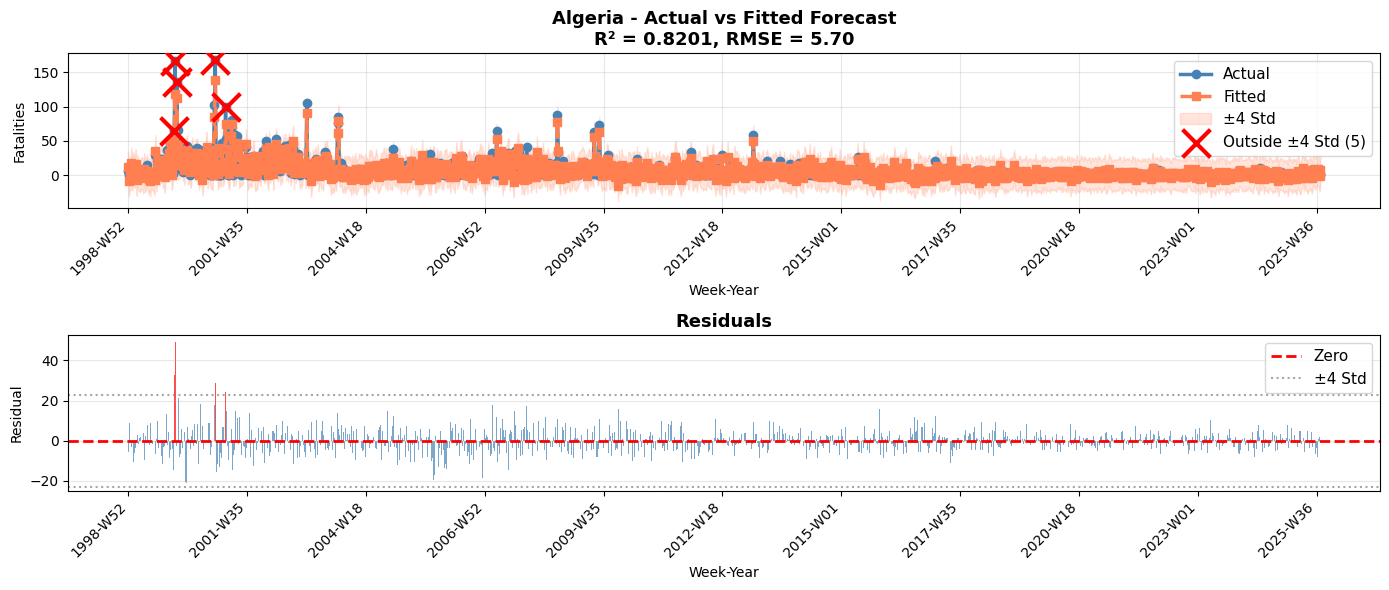

In [82]:
# highest concentration anomalies correspond to Algerian Civil War (1992-2002)
plot_single_country_forecast(
    forecast_data,
    "Algeria",
    bound_mult=4
)

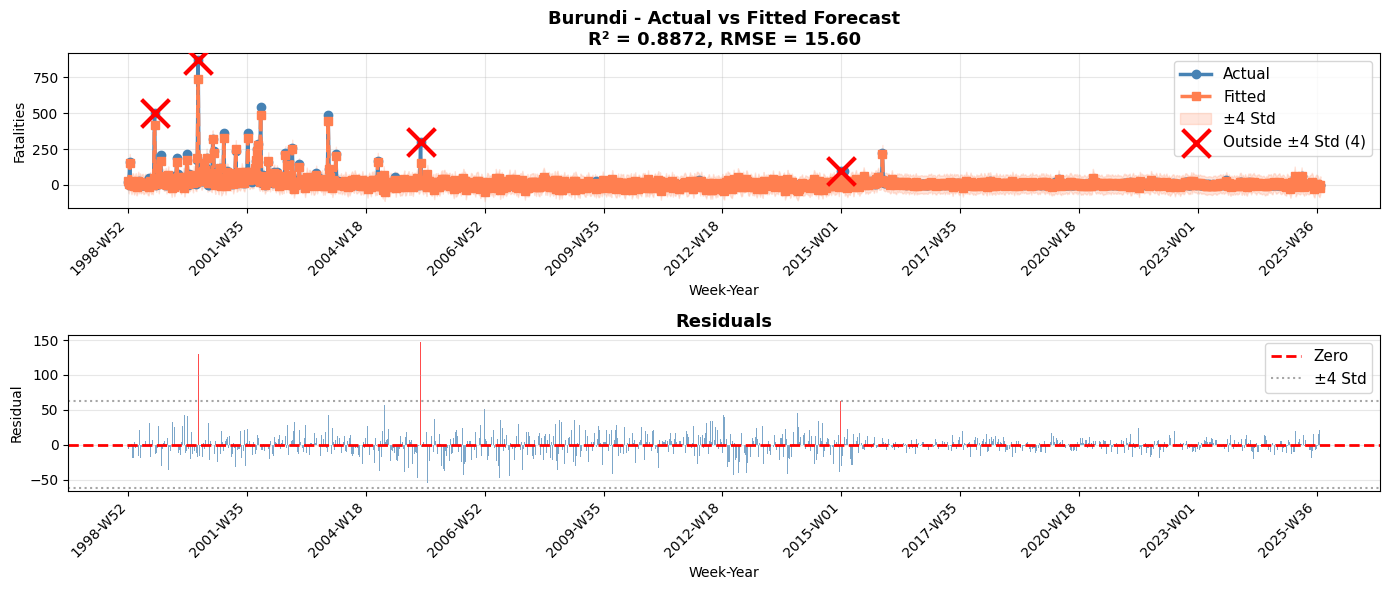

In [86]:
# Burundi Civil War from 1993-2005
plot_single_country_forecast(
    forecast_data,
    "Burundi",
    bound_mult=4
)

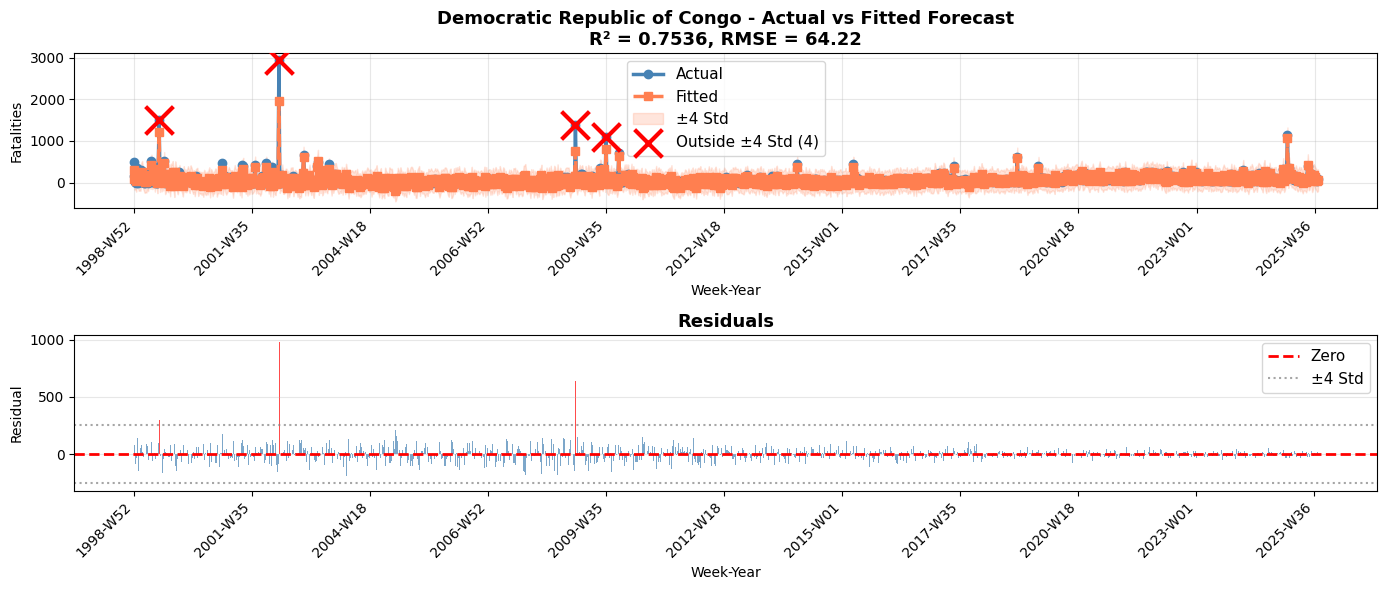

In [88]:
# Not sure what these anomalies map to
plot_single_country_forecast(
    forecast_data,
    "Democratic Republic of Congo",
    bound_mult=4
)

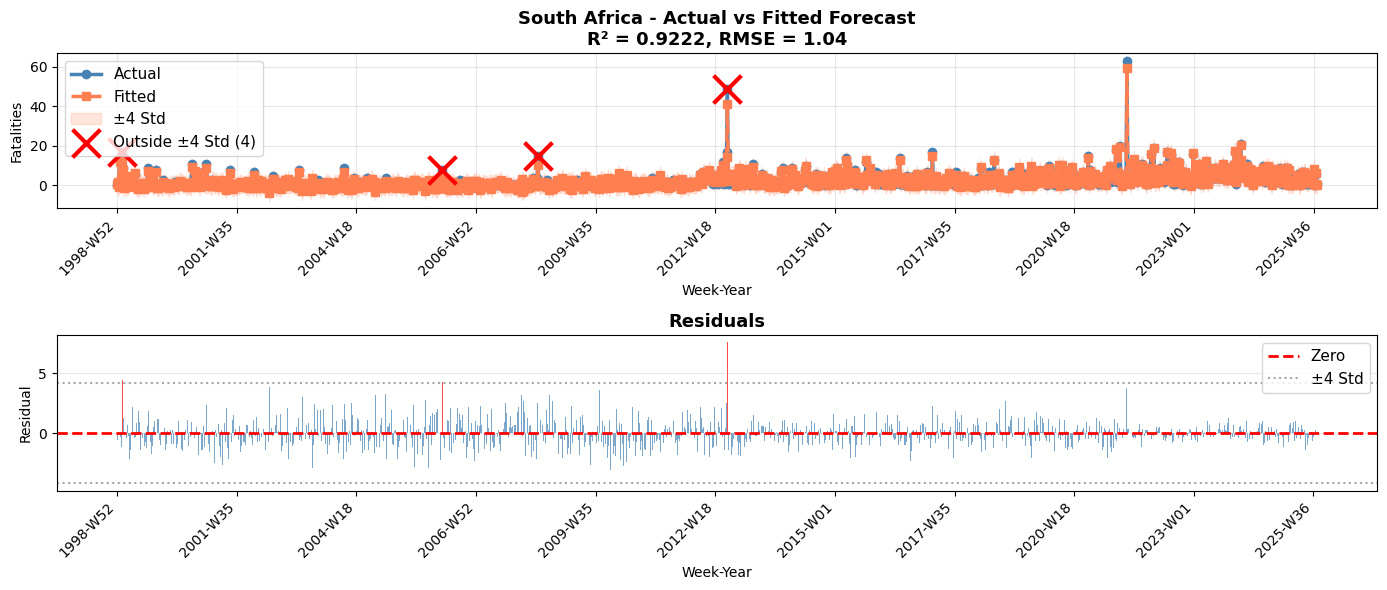

In [83]:
# Marikana massacre was August 2012 - 34 miners killed
plot_single_country_forecast(
    forecast_data,
    "South Africa",
    bound_mult=4
)

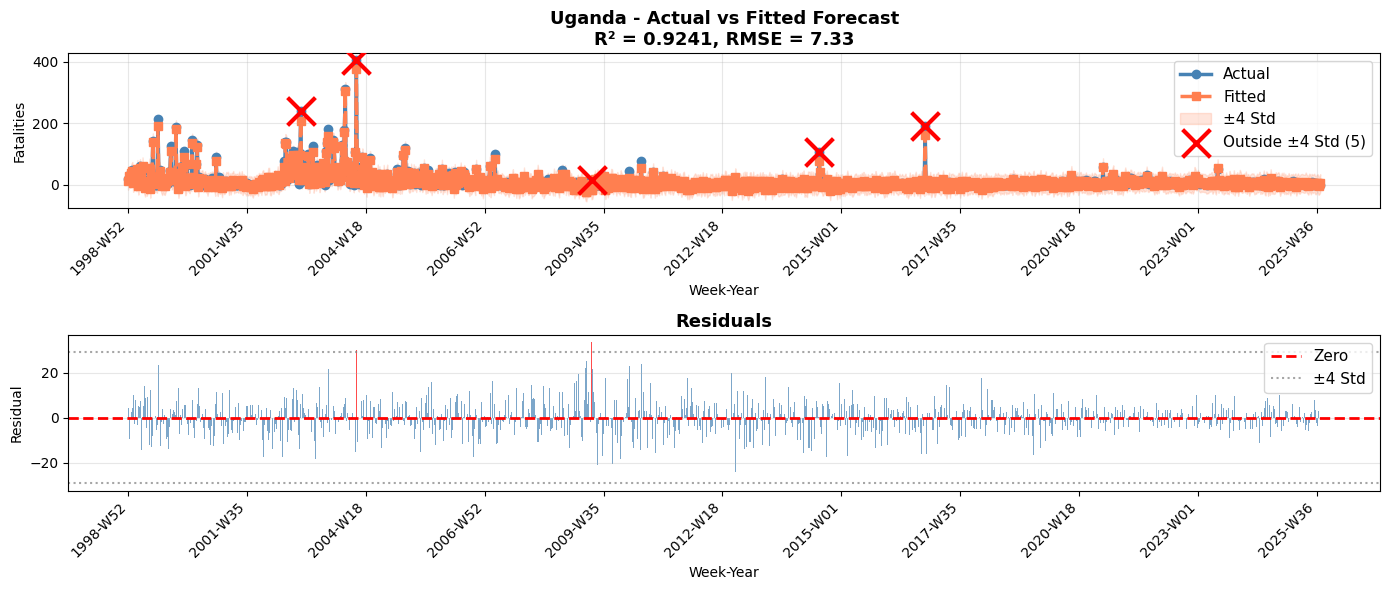

In [85]:
# Anomaly around the same time as this news report: https://press.un.org/en/2004/afr968.doc.htm
plot_single_country_forecast(
    forecast_data,
    "Uganda",
    bound_mult=4
)

Ran out of time to do country-country correlation analysis!

Thanks for your consideration!